# Popular Data Science Questions

## 1.Ask

The aim of this project is to help a company, that works in producing data science content on what best content to focus on.
The best content will be the one data science enthusiasts are more interested in learning.  
I am going to use __[Data Science Stack Exchange](https://datascience.stackexchange.com/)__ to determine what content should a data science education company create, based on interest by subject.

## 2. Prepare

### Stack Exchange Data Explorer

Stack Exchange provides a public __[data base](https://data.stackexchange.com/datascience/query/new)__ for each of its websites. <br> The tables that look promising towards finding the most popular content include:
* Posts
* PostTags
* Tags
* TagSynonyms

Running a few exploratory queries, leads us to focus our efforts on Posts table. 

### Getting the Data

The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal

|Columns|Explanation|
|--------|-----------|
|Id|An identification number for the post.|
|PostTypeId|An identification number for the type of post.|
|CreationDate|The date and time of creation of the post.|
|Score|The post's score.|
|ViewCount|How many times the post was viewed.|
|Tags|What tags were used.|
|Answercount|How many answers the question got (only applicable to question posts).|
|Favoritecount|How many times the question was favored (only applicable to question posts).


Since we're only interested in recent posts, we'll limit our analysis to the posts of 2020.


In [1]:
#To get the relevant data we run the following query.

#SELECT Id, CreationDate,
       #Score, ViewCount, Tags,
       #AnswerCount, FavoriteCount
  #FROM posts
 #WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2020;

## 3. Process

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#We load the data and view a portion of it.

questions = pd.read_csv('./stack-exchange/QueryResults.csv', parse_dates = ['CreationDate'])
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,76209,2020-06-18 02:22:19,1,89,<time-series><predictive-modeling>,2,NaN
1,76217,2020-06-18 06:37:18,1,41,<recommender-system><data-science-model>,0,NaN
2,76218,2020-06-18 06:44:31,1,332,<python><scikit-learn><gpu><natural-gradient-b...,1,NaN
3,76220,2020-06-18 07:15:24,2,115,<python><image-preprocessing>,1,NaN
4,76221,2020-06-18 07:26:27,2,52,<dataset><regression><data><categorical-data><...,0,NaN


In [4]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6424 non-null   int64         
 1   CreationDate   6424 non-null   datetime64[ns]
 2   Score          6424 non-null   int64         
 3   ViewCount      6424 non-null   int64         
 4   Tags           6424 non-null   object        
 5   AnswerCount    6424 non-null   int64         
 6   FavoriteCount  1031 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 351.4+ KB


 * Only the FavoriteCount column has missing values.
 
 * The  types of each column are adequate.
 
 
 We see that every value in the Tags column is a string. On Stack Exchange, each question can only have a maximum of five tags __[(source)](https://meta.stackexchange.com/a/18879)__, so one way to deal with this column is to create five columns in questions called Tag1, Tag2, Tag3, Tag4, and Tag5 and populate the columns with the tags in each row.
 
 
 However, since it doesn't help in relating tags from one question to another, we'll just keep them as a list.


In [5]:
#We change the column headers to snake case naming convention and fill the null values in favorite_count column with zeros.

questions.rename(columns= {'Id':'id','CreationDate':'creation_date','Score':'score','ViewCount':'view_count','Tags':'tags','AnswerCount':'answer_count','FavoriteCount':'favorite_count'},inplace=True)
questions['favorite_count'].fillna(0,inplace=True)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              6424 non-null   int64         
 1   creation_date   6424 non-null   datetime64[ns]
 2   score           6424 non-null   int64         
 3   view_count      6424 non-null   int64         
 4   tags            6424 non-null   object        
 5   answer_count    6424 non-null   int64         
 6   favorite_count  6424 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 351.4+ KB


In [6]:
#Cleaned the tags column into a list

questions['tags'] = questions['tags'].str.replace('^<|>$',"").str.split('><')
questions.head()

,id,creation_date,score,view_count,tags,answer_count,favorite_count
0,76209,2020-06-18 02:22:19,1,89,"[time-series, predictive-modeling]",2,0.0
1,76217,2020-06-18 06:37:18,1,41,"[recommender-system, data-science-model]",0,0.0
2,76218,2020-06-18 06:44:31,1,332,"[python, scikit-learn, gpu, natural-gradient-b...",1,0.0
3,76220,2020-06-18 07:15:24,2,115,"[python, image-preprocessing]",1,0.0
4,76221,2020-06-18 07:26:27,2,52,"[dataset, regression, data, categorical-data, ...",0,0.0


## 4. Analyze

### Most Used

In [7]:
tags = {}
for tag in questions['tags']:
    for t in tag:
        if t not in tags:
            tags[t] = 1
        else:
            tags[t] += 1
tags

{'time-series': 309,
 'predictive-modeling': 183,
 'recommender-system': 74,
 'data-science-model': 128,
 'python': 1242,
 'scikit-learn': 454,
 'gpu': 35,
 'natural-gradient-boosting': 10,
 'image-preprocessing': 54,
 'dataset': 257,
 'regression': 318,
 'data': 151,
 'categorical-data': 74,
 'open-source': 1,
 'feature-engineering': 132,
 'classification': 568,
 'statistics': 217,
 'xgboost': 153,
 'accuracy': 84,
 'machine-learning': 1945,
 'naive-bayes-classifier': 45,
 'python-3.x': 113,
 'keras': 572,
 'tensorflow': 481,
 'class-imbalance': 116,
 'auc': 23,
 'clustering': 217,
 'mathematics': 56,
 'javascript': 5,
 'svm': 101,
 'random-forest': 177,
 'lightgbm': 23,
 'nlp': 517,
 'pytorch': 144,
 'shap': 15,
 'fasttext': 6,
 'decision-trees': 151,
 'machine-learning-model': 162,
 'visualization': 103,
 'embeddings': 42,
 'error-handling': 7,
 'pandas': 249,
 'numpy': 77,
 'dataframe': 75,
 'cross-validation': 145,
 'training': 152,
 'prediction': 89,
 'anomaly-detection': 58,
 't

In [8]:
popular_tags = pd.Series(tags).sort_values(ascending= False).head(20)
popular_tags

machine-learning       1945
python                 1242
deep-learning           888
neural-network          738
keras                   572
classification          568
nlp                     517
tensorflow              481
scikit-learn            454
regression              318
time-series             309
cnn                     293
dataset                 257
lstm                    250
pandas                  249
statistics              217
clustering              217
r                       198
predictive-modeling     183
feature-selection       182
dtype: int64

Machine-learning and Python were the mostly used tags on DSSE's questions in 2020, with above a thousand use count.

### Most Viewed

In [9]:
tag_views = {}
for i, tag in enumerate(questions['tags']):
    for t in tag:
        if t not in tag_views:
            tag_views[t] = questions['view_count'].iloc[i]
        else:
            tag_views[t] += questions['view_count'].iloc[i]
tag_views

{'time-series': 80447,
 'predictive-modeling': 36349,
 'recommender-system': 14599,
 'data-science-model': 34340,
 'python': 680709,
 'scikit-learn': 264731,
 'gpu': 18084,
 'natural-gradient-boosting': 2367,
 'image-preprocessing': 29834,
 'dataset': 106850,
 'regression': 74301,
 'data': 50616,
 'categorical-data': 20500,
 'open-source': 52,
 'feature-engineering': 27380,
 'classification': 152087,
 'statistics': 45646,
 'xgboost': 62055,
 'accuracy': 54902,
 'machine-learning': 603751,
 'naive-bayes-classifier': 24064,
 'python-3.x': 101290,
 'keras': 411252,
 'tensorflow': 285176,
 'class-imbalance': 69238,
 'auc': 14338,
 'clustering': 51357,
 'mathematics': 8667,
 'javascript': 474,
 'svm': 66870,
 'random-forest': 47361,
 'lightgbm': 19792,
 'nlp': 183983,
 'pytorch': 36018,
 'shap': 4839,
 'fasttext': 824,
 'decision-trees': 42954,
 'machine-learning-model': 59036,
 'visualization': 60450,
 'embeddings': 8257,
 'error-handling': 4541,
 'pandas': 310135,
 'numpy': 65155,
 'dataf

In [10]:
most_viewed = pd.Series(tag_views).sort_values(ascending= False).head(20)
most_viewed

python              680709
machine-learning    603751
keras               411252
pandas              310135
tensorflow          285176
deep-learning       270516
scikit-learn        264731
neural-network      233188
nlp                 183983
classification      152087
dataframe           116370
dataset             106850
lstm                103891
python-3.x          101290
cnn                 101253
r                    88730
bert                 85812
loss-function        84009
time-series          80447
regression           74301
dtype: int64

Questions that used the Python and Machine-learning tags were the most viewed on DSSE in 2020, with over six hundred thousand cumulative views each.

### Visualize

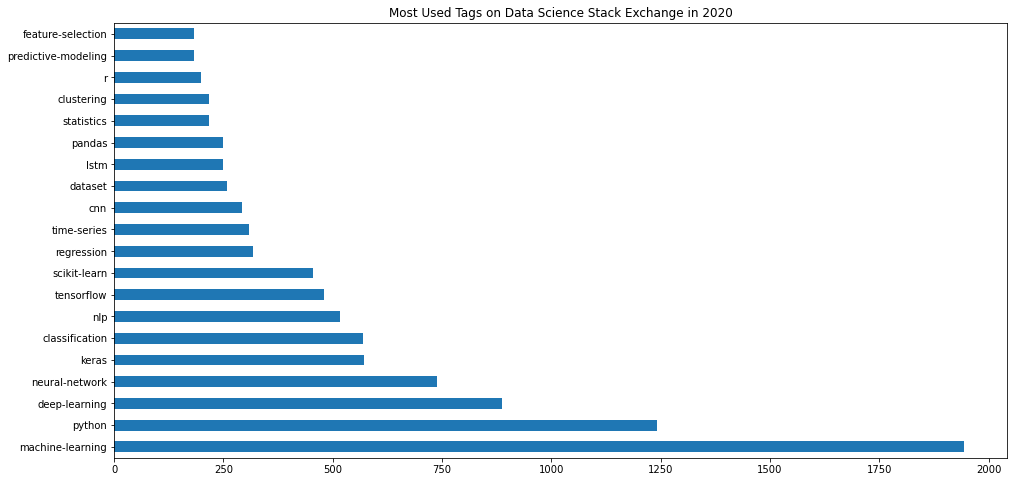

In [11]:
%matplotlib inline
popular_tags.plot.barh(title= 'Most Used Tags on Data Science Stack Exchange in 2020',figsize= (16,8))
plt.show()

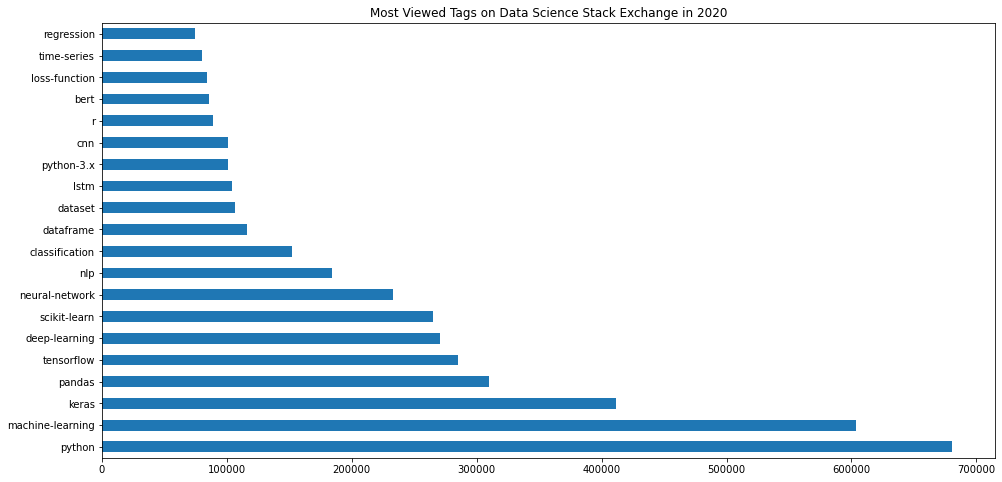

In [12]:
most_viewed.plot.barh(title= 'Most Viewed Tags on Data Science Stack Exchange in 2020',figsize= (16,8))
plt.show()

## 5. Share

## 6. Act

The company should give much priority to data science content focusing on machine learning while the  programming language should be Python. The content should use pandas library alongside keras and tensorflow machine-learning frameworks.